In [83]:
# импортируем необходимые библиотеки
import cv2 # для работы с изображениями
import matplotlib.pyplot as plt # для вывода изображений

from utils import * 
from darknet import Darknet # network architecture

# настройки для решения проблем с mac os
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [84]:
# Set the location and name of the cfg file
cfg_file = './cfg/yolov3.cfg'

# Set the location and name of the pre-trained weights file
weight_file = './weights/yolov3_weights.weights'

# Set the location and name of the COCO object classes file
namesfile = 'data/coco.names'

# Load the network architecture
m = Darknet(cfg_file)

# Load the pre-trained weights
m.load_weights(weight_file)

# Load the COCO object classes
class_names = load_class_names(namesfile)

In [85]:
# Print the neural network used in YOLOv3
m.print_network()
# Set the IOU threshold
iou_thresh = 0.4

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256
   13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   14 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
   15 shortcut 12
   16 conv    128  1 x 1



It took 1.105 seconds to detect the objects in the image.

Number of Objects Detected: 10 

Objects Found and Confidence Level:

1. person: 1.000000
2. person: 1.000000
3. person: 1.000000
4. person: 0.999930
5. person: 1.000000
6. person: 0.999969
7. person: 0.999585
8. person: 0.999605
9. person: 0.996194
10. person: 0.999628


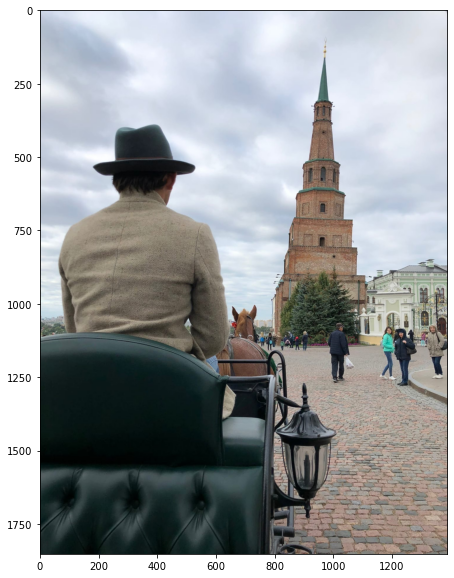

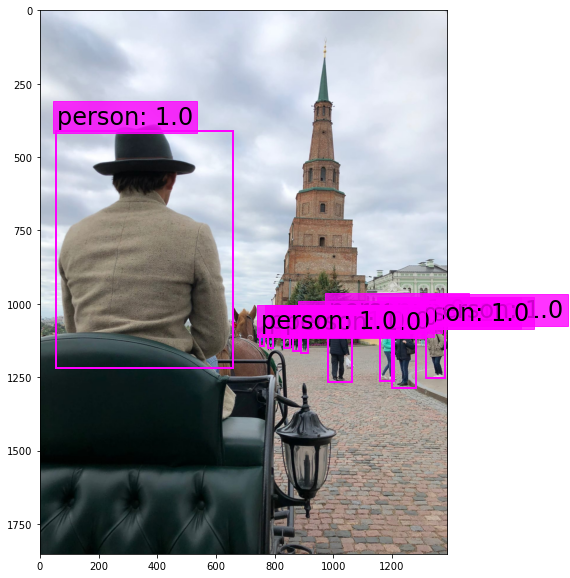

In [75]:
# Set the NMS threshold
nms_thresh = 0.6  

# Set the default figure size
plt.rcParams['figure.figsize'] = [12.0, 10.0]

# Load the image
img = cv2.imread('./images/voyage.jpg')

# Convert the image to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(original_image)

# We resize the image to the input width and height of the first layer of the network.    
resized_image = cv2.resize(original_image, (m.width, m.height))

# Detect objects in the image
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

# Print the objects found and the confidence level
print_objects(boxes, class_names)

#Plot the image with bounding boxes and corresponding object class labels
plot_boxes(original_image, boxes, class_names, plot_labels = True)



It took 1.119 seconds to detect the objects in the image.

Number of Objects Detected: 13 

Objects Found and Confidence Level:

1. bird: 0.999996
2. bird: 0.999989
3. bird: 0.999972
4. bird: 0.999966
5. bird: 0.995873
6. bird: 0.999978
7. bird: 0.992218
8. bird: 0.999992
9. bird: 0.999993
10. bird: 0.995297
11. bird: 0.999885
12. bird: 0.999981
13. bird: 0.993138


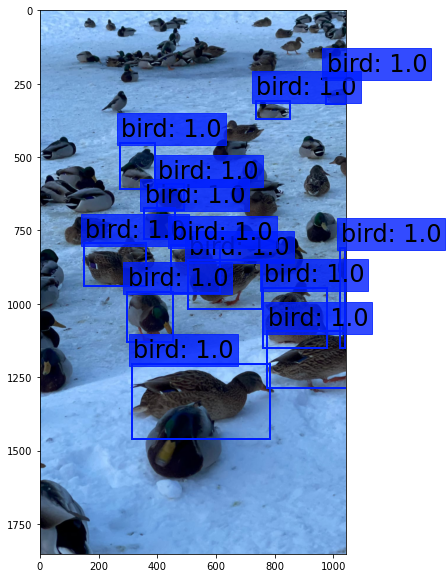

In [76]:
nms_thresh = 0.1
img = cv2.imread('./images/ducks.jpg')
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(original_image, (m.width, m.height))
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)
print_objects(boxes, class_names)
plot_boxes(original_image, boxes, class_names, plot_labels = True)



It took 1.134 seconds to detect the objects in the image.

Number of Objects Detected: 2 

Objects Found and Confidence Level:

1. dog: 0.495220
2. bench: 0.920425


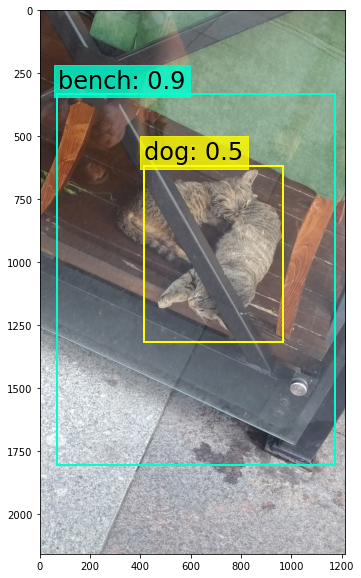

In [77]:
nms_thresh = 0.5
img = cv2.imread('./images/cats.jpg')
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(original_image, (m.width, m.height))
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)
print_objects(boxes, class_names)
plot_boxes(original_image, boxes, class_names, plot_labels = True)



It took 1.119 seconds to detect the objects in the image.

Number of Objects Detected: 7 

Objects Found and Confidence Level:

1. keyboard: 1.000000
2. laptop: 0.999853
3. cup: 0.999998
4. cell phone: 0.998350
5. laptop: 0.993199
6. vase: 0.999071
7. tvmonitor: 0.999999


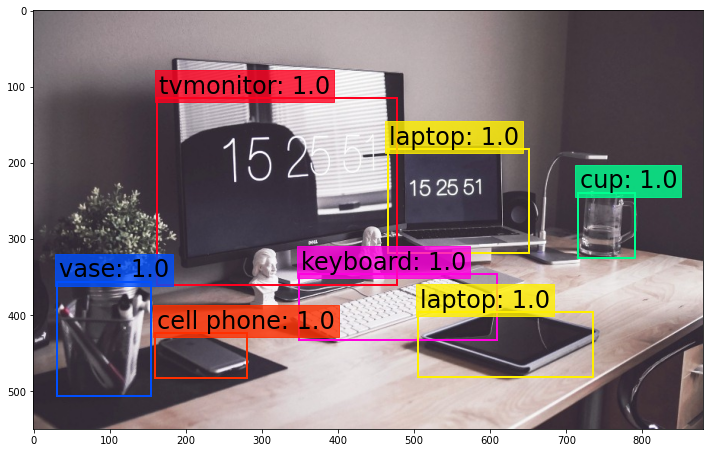

In [82]:
nms_thresh = 0.4
img = cv2.imread('./images/table.jpg')
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(original_image, (m.width, m.height))
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)
print_objects(boxes, class_names)
plot_boxes(original_image, boxes, class_names, plot_labels = True)



It took 1.225 seconds to detect the objects in the image.

Number of Objects Detected: 11 

Objects Found and Confidence Level:

1. person: 1.000000
2. person: 1.000000
3. person: 1.000000
4. person: 0.999974
5. person: 1.000000
6. umbrella: 1.000000
7. person: 1.000000
8. umbrella: 1.000000
9. umbrella: 1.000000
10. umbrella: 1.000000
11. umbrella: 0.999998


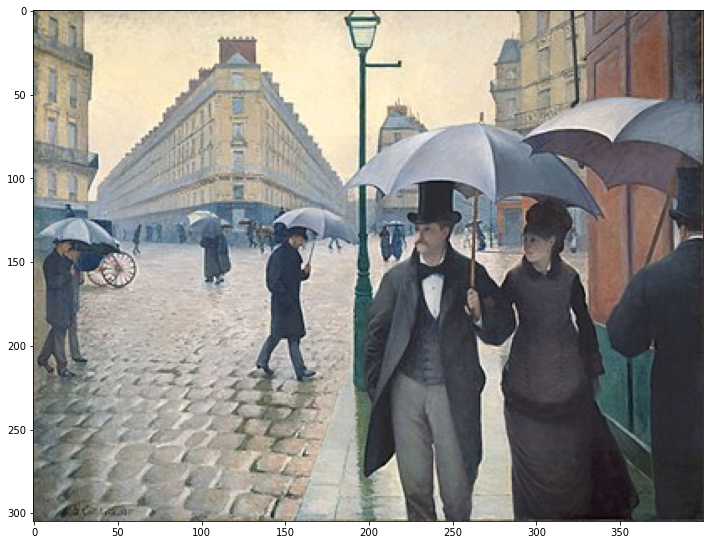

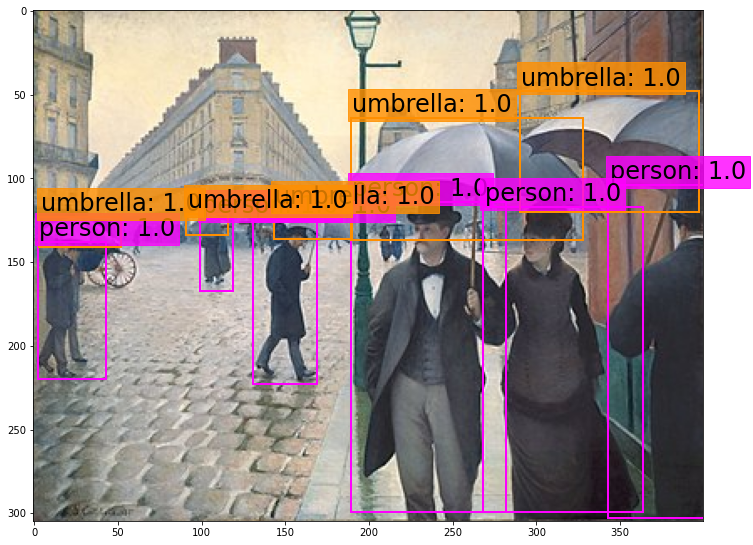

In [95]:
nms_thresh = 0.6
img = cv2.imread('./images/road.jpg')
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(original_image)
resized_image = cv2.resize(original_image, (m.width, m.height))
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)
print_objects(boxes, class_names)
plot_boxes(original_image, boxes, class_names, plot_labels = True)



It took 1.094 seconds to detect the objects in the image.

Number of Objects Detected: 9 

Objects Found and Confidence Level:

1. person: 1.000000
2. boat: 0.999996
3. person: 0.999964
4. boat: 0.999997
5. boat: 0.999982
6. boat: 0.999998
7. boat: 0.999971
8. boat: 0.999993
9. car: 0.993528


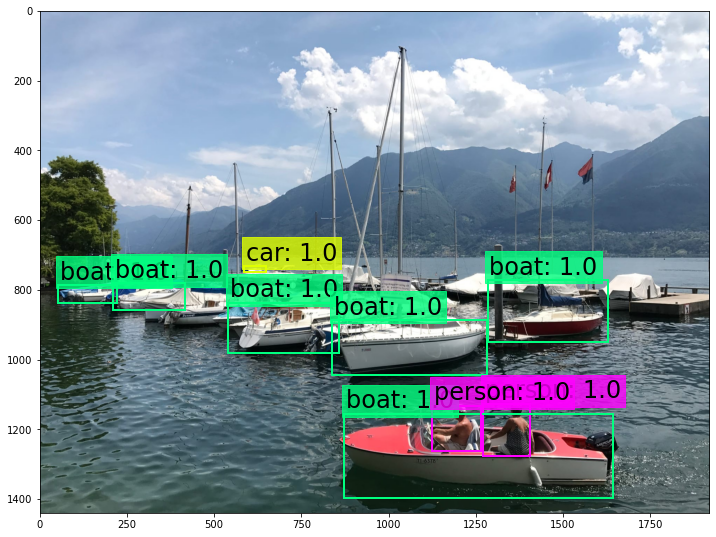

In [98]:
nms_thresh = 0.2
img = cv2.imread('./images/boats.jpg')
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(original_image, (m.width, m.height))
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)
print_objects(boxes, class_names)
plot_boxes(original_image, boxes, class_names, plot_labels = True)



It took 1.199 seconds to detect the objects in the image.

Number of Objects Detected: 5 

Objects Found and Confidence Level:

1. sports ball: 0.999876
2. person: 1.000000
3. person: 1.000000
4. person: 1.000000
5. person: 1.000000


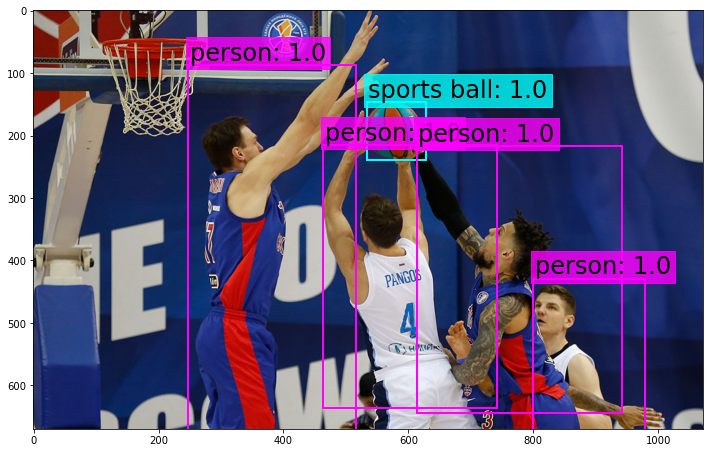

In [99]:
nms_thresh = 0.4
img = cv2.imread('./images/match.jpg')
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(original_image, (m.width, m.height))
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)
print_objects(boxes, class_names)
plot_boxes(original_image, boxes, class_names, plot_labels = True)



It took 1.141 seconds to detect the objects in the image.

Number of Objects Detected: 3 

Objects Found and Confidence Level:

1. baseball glove: 0.999999
2. person: 1.000000
3. sports ball: 1.000000


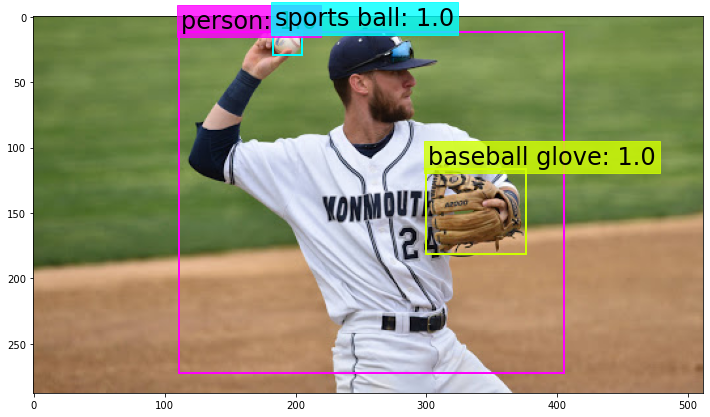

In [101]:
nms_thresh = 0.4
img = cv2.imread('./images/baseball.jpg')
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(original_image, (m.width, m.height))
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)
print_objects(boxes, class_names)
plot_boxes(original_image, boxes, class_names, plot_labels = True)



It took 1.146 seconds to detect the objects in the image.

Number of Objects Detected: 13 

Objects Found and Confidence Level:

1. cow: 0.663518
2. sheep: 0.999972
3. horse: 0.999984
4. horse: 0.997727
5. sheep: 0.999779
6. sheep: 0.999943
7. sheep: 0.999953
8. dog: 0.989336
9. horse: 0.999883
10. dog: 0.994887
11. horse: 0.999985
12. horse: 0.771845
13. sheep: 0.994616


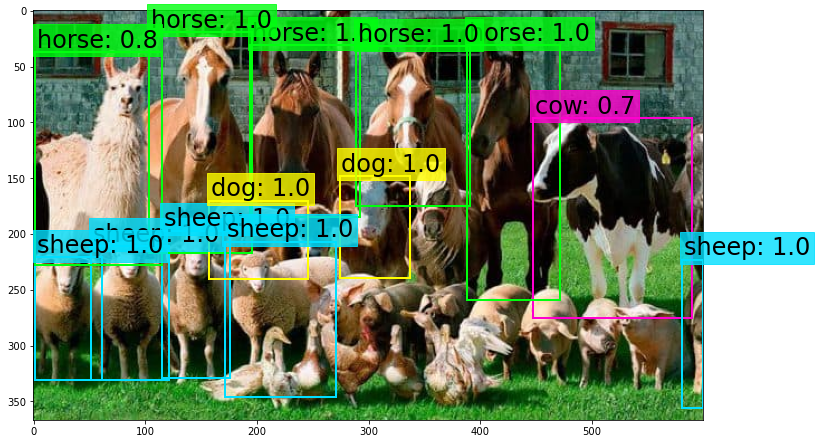

In [112]:
nms_thresh = 0.4
img = cv2.imread('./images/animals.jpg')
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(original_image, (m.width, m.height))
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)
print_objects(boxes, class_names)
plot_boxes(original_image, boxes, class_names, plot_labels = True)